In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Desktop/classes/Semester 5/BEE 4750/homework/hw02-Erc03`


In [2]:
using Plots
using LaTeXStrings
using Distributions

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.55 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

In [8]:
#model for DO concentration

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    α1 = exp(-ka * x / U)
    α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
    α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
    C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return C
end

#distance
x1 = 0:1:15000 #km 
x2 = 0:1:(50000-15001) #km 

#constants
kc = 0.35 #1/day
kn = 0.25 #1/day
ka = 0.55 #1/day
Cs = 10 #mg/L

#River Parameters
Cr = 7.5 #mg/L; DO river
Br = 5 #mg/L; CBOD river
Nr = 5 #mg/L; NBOD river
U = 6000 #m/day; river velocity
Qr = 100000 #L/day; river inflow

#Waste Stream 1 Values
C1 = 5 #mg/L
Q1 = 10000 #L/day
N1 = 35 #mg/L
B1 = 50 #mg/L

#Waste Stream 2 Values
C2 = 5 #mg/L
Q2 = 15000 #L/day
N2 = 35 #mg/L
B2 = 45 #mg/L
Qr1 = Qr + Q1 ##L/day

#first waste stream values
C01 = (Cr*Qr + C1*Q1)/(Qr + Q1) #mg/L
B01 = (Br*Qr + B1*Q1)/(Qr + Q1) #mg/L
N01 = (Nr*Qr + N1*Q1)/(Qr + Q1) #mg/L

#DO Steam 1 
C1 = (y -> dissolved_oxygen(y, Cs, C01, B01, N01, ka, kc, kn, U)).(x1)

#finding values in river at 15000m downstream
B15 = B01 * exp((-1*kc*15000)/U)
N15 = N01 * exp((-1*kn*15000)/U)
C15 = C1[15001]

#second waste stream values
C02 = (C15*Qr1 + C2*Q2)/(Qr1 + Q2) #mg/L
B02 = (B15*Qr1 + B2*Q2)/(Qr1 + Q2) #mg/L
N02 = (N15*Qr1 + N2*Q2)/(Qr1 + Q2) #mg/L

C2 = (y -> dissolved_oxygen(y, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)

#create list that combines all DO values
C_all = append!(C1,C2)


#finding max DO values
DOmax = -1000000 #set DO value very low prior to iterating through all data
i = 0 #index
max_distance = 0 #set the max distance to 0 before iterating
for i in 1:length(C_all)
    DOindex = C_all[i] #index DO is DO value at x=i 
    if DOindex > DOmax
        DOmax = DOindex 
        max_distance = i #max value for dist. will become x=i 
    end
end

distancedownstream = max_distance - 1 #needed because the distances starts at 0, not 1

#print statements 
println("The maximum dissolved oxygen level is  ", DOmax, " mg/L")
println("This is found  ", distancedownstream, "m downstream.")


The maximum dissolved oxygen level is  7.2727272727272725 mg/L
This is found  0m downstream.


### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

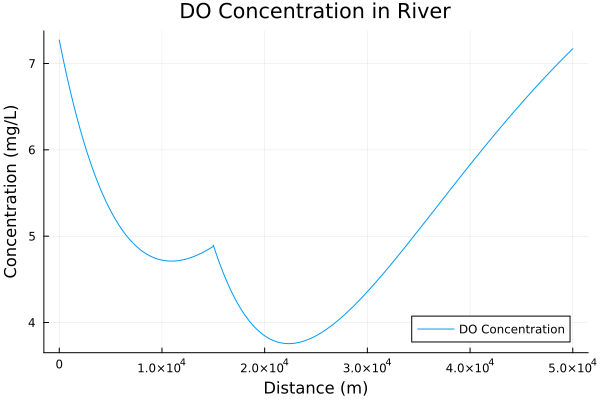

In [4]:
#plotting
using Plots
x = 1:1:50001
plot(x,C_all, title="DO Concentration in River", label="DO Concentration")
xlabel!("Distance (m)")
ylabel!("Concentration (mg/L)")

The graph above demonstrates the concentration of dissolved oxygen at a given point. This is known as an oxygen sag curve. Dissolved oxygen will reach a minimum value, and then will gradually increase after. There is a dip present at 15000 m because that is where the second waste stream comes in. The waste from the two streams reduces the dissolved oxygen. Dissolved oxygen decreases because organic decomposition consumes oxygen. 

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

In [9]:
#model for DO concentration

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    α1 = exp(-ka * x / U)
    α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
    α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
    C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return C
end

#waste stream 1

#distance
x1 = 0:1:15000 #km 
x2 = 0:1:(50000-15001) #km 

#constants
kc = 0.35 #1/day
kn = 0.25 #1/day
ka = 0.55 #1/day
Cs = 10 #mg/L

#River Parameters
Cr = 7.5 #mg/L; DO river
Br = 5 #mg/L; CBOD river
Nr = 5 #mg/L; NBOD river
U = 6000 #m/day; river velocity
Qr = 100000 #L/day; river inflow

#Waste Stream 1 Values
C1 = 5 #mg/L
Q1 = 10000 #L/day
N1 = 35 #mg/L
B1 = 50 #mg/L

#Waste Stream 2 Values
C2 = 5 #mg/L
Q2 = 15000 #L/day
N2 = 35 #mg/L
B2 = 45 #mg/L
Qr1 = Qr + Q1 ##L/day

#first waste stream values
C01 = (Cr*Qr + C1*Q1)/(Qr + Q1) #mg/L
B01 = (Br*Qr + B1*Q1)/(Qr + Q1) #mg/L
N01 = (Nr*Qr + N1*Q1)/(Qr + Q1) #mg/L

#DO Steam 1 
C1 = (y -> dissolved_oxygen(y, Cs, C01, B01, N01, ka, kc, kn, U)).(x1)

#finding values in river at 15000m downstream
B15 = B01 * exp((-1*kc*15000)/U)
N15 = N01 * exp((-1*kn*15000)/U)
C15 = C1[15001]

#second waste stream values
C02 = (C15*Qr1 + C2*Q2)/(Qr1 + Q2) #mg/L
B02 = (B15*Qr1 + B2*Q2)/(Qr1 + Q2) #mg/L
N02 = (N15*Qr1 + N2*Q2)/(Qr1 + Q2) #mg/L

C2 = (y -> dissolved_oxygen(y, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)

#create list that combines all DO values
C_all = append!(C1,C2)


#finding where DO becomes 6 mg/L in wastestream 2
i= 15001
DO6dist = 0 
distance = 0
# while loop
while i <= length(C_all) 
    # Assigning value to object
    global distance = i
    if C_all[i] >= 6
        global DO6dist = distance #max value for dist. will become x=i 
        break
    else
        global i = i + 1
    end
      
# Ending Loop
end

#print statements 
println("The concentration becomes 6 mg/L ", DO6dist-15000, "m downstream of the second waste stream and ", DO6dist, "m downstream of the intial ")

The concentration becomes 6 mg/L 26165m downstream of the second waste stream and 41165m downstream of the intial 


### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

*need to decrease CBOD and NBOD in wastestream 2

In [24]:
#need to reduce the CBOD and NBOD in WS 2

#model for DO concentration

treat = 1 #percent treatment

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    α1 = exp(-ka * x / U)
    α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
    α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
    C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return C
end

for z in 1:100
    #distance
    x1 = 0:1:15000 #km 
    x2 = 0:1:(50000-15001) #km 

    #constants
    kc = 0.35 #1/day
    kn = 0.25 #1/day
    ka = 0.55 #1/day
    Cs = 10 #mg/L

    #River Parameters
    Cr = 7.5 #mg/L; DO river
    Br = 5 #mg/L; CBOD river
    Nr = 5 #mg/L; NBOD river
    U = 6000 #m/day; river velocity
    Qr = 100000 #L/day; river inflow

    #Waste Stream 1 Values
    C1 = 5 #mg/L
    Q1 = 10000 #L/day
    N1 = 35 #mg/L
    B1 = 50 #mg/L

    #Waste Stream 2 Values
    C2 = 5 #mg/L
    Q2 = 15000 #L/day
    N2 = 35 #mg/L
    B2 = 45 #mg/L
    Qr1 = Qr + Q1 ##L/day

    #first waste stream values
    C01 = (Cr*Qr + C1*Q1)/(Qr + Q1) #mg/L
    B01 = (Br*Qr + B1*Q1)/(Qr + Q1) #mg/L
    N01 = (Nr*Qr + N1*Q1)/(Qr + Q1) #mg/L

    #DO Steam 1 
    C1 = (y -> dissolved_oxygen(y, Cs, C01, B01, N01, ka, kc, kn, U)).(x1)

    #finding values in river at 15000m downstream
    B15 = B01 * exp((-1*kc*15000)/U)
    N15 = N01 * exp((-1*kn*15000)/U)
    C15 = C1[15001]

    #second waste stream values
    C02 = (C15*Qr1 + C2*Q2)/(Qr1 + Q2) #mg/L
    B02 = (B15*Qr1 + (treat*B2)*Q2)/(Qr1 + Q2) #mg/L
    N02 = (N15*Qr1 + (treat*N2)*Q2)/(Qr1 + Q2) #mg/L

    C2 = (y -> dissolved_oxygen(y, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)

    #create list that combines all DO values
    C_all = append!(C1,C2)

    #seeing if minimum is below 4
    global minval = minimum(C_all) # this is min value
    if minval <= 4
        global treat = treat - 0.01 #changing treatment percent if below 4
    else 
        break #break if minimum value is not below 4 anymore
    end
end

println("The minimum treatment needed is ", (1-(round(treat; digits = 2)))*100, " %")
println("This means that it is ", (round(treat; digits = 2))*100, " % of the original.")


The minimum treatment needed is 12.0 %
This means that it is 88.0 % of the original.


### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

In [25]:
#need to reduce the CBOD and NBOD in WS 2

#model for DO concentration

treat = 1 #percent of original

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    α1 = exp(-ka * x / U)
    α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
    α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
    C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return C
end

for z in 1:100 #used to go through all percentages if neccessary
    #distance
    x1 = 0:1:15000 #km 
    x2 = 0:1:(50000-15001) #km 

    #constants
    kc = 0.35 #1/day
    kn = 0.25 #1/day
    ka = 0.55 #1/day
    Cs = 10 #mg/L

    #River Parameters
    Cr = 7.5 #mg/L; DO river
    Br = 5 #mg/L; CBOD river
    Nr = 5 #mg/L; NBOD river
    U = 6000 #m/day; river velocity
    Qr = 100000 #L/day; river inflow

    #Waste Stream 1 Values
    C1 = 5 #mg/L
    Q1 = 10000 #L/day
    N1 = 35 #mg/L
    B1 = 50 #mg/L

    #Waste Stream 2 Values
    C2 = 5 #mg/L
    Q2 = 15000 #L/day
    N2 = 35 #mg/L
    B2 = 45 #mg/L
    Qr1 = Qr + Q1 ##L/day

    #first waste stream values
    C01 = (Cr*Qr + C1*Q1)/(Qr + Q1) #mg/L
    B01 = (Br*Qr + (treat*B1)*Q1)/(Qr + Q1) #mg/L
    N01 = (Nr*Qr + (treat*N1)*Q1)/(Qr + Q1) #mg/L

    #DO Steam 1 
    C1 = (y -> dissolved_oxygen(y, Cs, C01, B01, N01, ka, kc, kn, U)).(x1)

    #finding values in river at 15000m downstream
    B15 = B01 * exp((-1*kc*15000)/U)
    N15 = N01 * exp((-1*kn*15000)/U)
    C15 = C1[15001]

    #second waste stream values
    C02 = (C15*Qr1 + C2*Q2)/(Qr1 + Q2) #mg/L
    B02 = (B15*Qr1 + (treat*B2)*Q2)/(Qr1 + Q2) #mg/L
    N02 = (N15*Qr1 + (treat*N2)*Q2)/(Qr1 + Q2) #mg/L

    C2 = (y -> dissolved_oxygen(y, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)

    #create list that combines all DO values
    C_all = append!(C1,C2)

    #seeing if minimum is below 4
    global minval = minimum(C_all) # this is min value
    if minval <= 4
        global treat = treat - 0.01 #changing treatment percent if below 4
    else 
        break #break if minimum value is not below 4 anymore
    end
end

#print statements
println("The minimum treatment needed is ", (1-(round(treat; digits = 2)))*100, " %")
println("This means that it is a percentage of ", round(treat; digits = 2)*100, " % of the original for each waste stream.")


The minimum treatment needed is 6.999999999999995 %
This means that it is a percentage of 93.0 % of the original for each waste stream.


### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

If I were designing a waste treatment plan for discharges into the river, I would look at cost prices before making my decision. If the treatment costs were very expensive, splitting costs would be the best step because then they can split the percentage they have to remove. Also, another consideration is if the waste stream increases for either or both waste producers. If the amount of waste coming into the river is going to increase because waste stream 1 produces more waste, then they should be responsible for some of the cost and should split the costs with waste stream 2. However, without thinking about these considerations, I would most likely have waste stream 2 alone be treated because, overall, it's overall percentage decrease is less than the two being equally treated; doing this reduces percantage by 12% while splitting it is 14%. Additionally, waste stream 2 has a larger flow rate, so it contributing more to the waste in the river. 

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

In [16]:
#looking at change in conc. at river inflow

#model for DO concentration

treatment =  0.93 #percent of original
fail = 0 
numtrials = 1000 #large number of trials to have more accurate probability 

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    α1 = exp(-ka * x / U)
    α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
    α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
    C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return C
end

for x in 1:1:numtrials #iterating through all trials
    #distance
    x1 = 0:1:15000 #km 
    x2 = 0:1:(50000-15001) #km 

    #constants
    kc = 0.35 #1/day
    kn = 0.25 #1/day
    ka = 0.55 #1/day
    Cs = 10 #mg/L

    #River Parameters
    Cr = rand(6:8) #mg/L; DO river
    Br = 5 #mg/L; CBOD river
    Nr = 5 #mg/L; NBOD river
    U = 6000 #m/day; river velocity
    Qr = 100000 #L/day; river inflow

    #Waste Stream 1 Values
    C1 = 5 #mg/L
    Q1 = 10000 #L/day
    N1 = 35 #mg/L
    B1 = 50 #mg/L

    #Waste Stream 2 Values
    C2 = 5 #mg/L
    Q2 = 15000 #L/day
    N2 = 35 #mg/L
    B2 = 45 #mg/L
    Qr1 = Qr + Q1 ##L/day

    #first waste stream values
    C01 = (Cr*Qr + C1*Q1)/(Qr + Q1) #mg/L
    B01 = (Br*Qr + (treatment*B1)*Q1)/(Qr + Q1) #mg/L
    N01 = (Nr*Qr + (treatment*N1)*Q1)/(Qr + Q1) #mg/L

    #DO Steam 1 
    C1 = (y -> dissolved_oxygen(y, Cs, C01, B01, N01, ka, kc, kn, U)).(x1)

    #finding values in river at 15000m downstream
    B15 = B01 * exp((-1*kc*15000)/U)
    N15 = N01 * exp((-1*kn*15000)/U)
    C15 = C1[15001]

    #second waste stream values
    C02 = (C15*Qr1 + C2*Q2)/(Qr1 + Q2) #mg/L
    B02 = (B15*Qr1 + (treatment*B2)*Q2)/(Qr1 + Q2) #mg/L
    N02 = (N15*Qr1 + (treatment*N2)*Q2)/(Qr1 + Q2) #mg/L

    C2 = (y -> dissolved_oxygen(y, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)

    #create list that combines all DO values
    C_all = append!(C1,C2)

    #seeing if minimum is below 4
    global minval = minimum(C_all) # this is min value
    if minval <= 4 #if it is below, fail number increases
        global fail = fail + 1 
    end
end

#probability of failures
probability = fail/numtrials

#print statement
println("Iterating through new DO concentrations for the river inflow,")
println("the probability of failing to comply with regualtory standards is ", probability)


Iterating through new DO concentrations for the river inflow,
the probability of failing to comply with regualtory standards is 0.667


### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

In [26]:
#adding a third waste stream 

#DO Model

treatment =  0.93 #percent of original
function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    α1 = exp(-ka * x / U)
    α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
    α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
    C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return C
end

distancevalue = 0 

for z in 1:1:15000

    #waste stream 1

    #distance
    x1 = 0:1:15000 #km 
    x2 = 0:1:(15001 + distancevalue) #km 
    x3 = 1:1:10000 #arbitrary values

    #constants
    kc = 0.35 #1/day
    kn = 0.25 #1/day
    ka = 0.55 #1/day
    Cs = 10 #mg/L

    #River Parameters
    Cr = 7.5 #mg/L; DO river
    Br = 5 #mg/L; CBOD river
    Nr = 5 #mg/L; NBOD river
    U = 6000 #m/day; river velocity
    Qr = 100000 #L/day; river inflow

    #Waste Stream 1 Values
    C1 = 5 #mg/L
    Q1 = 10000 #L/day
    N1 = 35 #mg/L
    B1 = 50 #mg/L

    #Waste Stream 2 Values
    C2 = 5 #mg/L
    Q2 = 15000 #L/day
    N2 = 35 #mg/L
    B2 = 45 #mg/L
    Qr1 = Qr + Q1 ##L/day

    #Waste Stream 3 Values
    C3 = 4.5 #mg/L
    Q3 = 5000 #L/day
    N3 = 45 #mg/L
    B3 = 50 #m/L
    Qr2 = Qr1+Q2 #L/day

    #first waste stream values
    C01 = (Cr*Qr + C1*Q1)/(Qr + Q1) #mg/L
    B01 = (Br*Qr + (treatment*B1)*Q1)/(Qr + Q1) #mg/L
    N01 = (Nr*Qr + (treatment*N1)*Q1)/(Qr + Q1) #mg/L

    #DO Steam 1 
    C1 = (y -> dissolved_oxygen(y, Cs, C01, B01, N01, ka, kc, kn, U)).(x1)

    #finding values in river at 15000m downstream
    B15 = B01 * exp((-1*kc*15000)/U)
    N15 = N01 * exp((-1*kn*15000)/U)
    C15 = C1[15001]

    #second waste stream values
    C02 = (C15*Qr1 + C2*Q2)/(Qr1 + Q2) #mg/L
    B02 = (B15*Qr1 + (treatment*B2)*Q2)/(Qr1 + Q2) #mg/L
    N02 = (N15*Qr1 + (treatment*N2)*Q2)/(Qr1 + Q2) #mg/L

    C2 = (y -> dissolved_oxygen(y, Cs, C02, B02, N02, ka, kc, kn, U)).(x2)

    C2x = length(C2) #length of C2

    #finding values in river at 50000m downstream
    Bunknown = B02 * exp((-1*kc*distancevalue)/U)
    Nunknown = N02 * exp((-1*kn*distancevalue)/U)
    Cunknown = C2[C2x]

    C03 = (Cunknown*Qr2 + C3*Q3)/(Qr2 + Q3) #mg/L
    B03 = (Bunknown*Qr2 + B3*Q3)/(Qr2 + Q3) #mg/L
    N03 = (Nunknown*Qr2 + N3*Q3)/(Qr2 + Q3) #mg/L

    C3 = (y -> dissolved_oxygen(y, Cs, C03, B03, N03, ka, kc, kn, U)).(x3)

    #create list that combines all DO values
    C_all = append!(C1,C2,C3)

    #seeing if minimum is below 4
    global minval = minimum(C_all) # this is min value
    if minval <= 4
        global distancevalue = distancevalue + 1 #changing distance from WS 2 for every iteration
    else 
        break #break if minimum value is not below 4 anymore
    end
end

return(distancevalue)

println("The third discharge has to be ",distancevalue, " m downstream of the second discharge")

The third discharge has to be 3878 m downstream of the second discharge


## References

List any external references consulted, including classmates.


I consulted with my classmate, Teagan Smith.